### Sprawdzenie warunków II SGU (SLS)
#### Osiadanie stopy fundamentowej 
Zgodnie z zapisem w PN-EN 1997-1 (Eurokod 7), Załącznik informacyjny F, do obliczenia osiadań konsolidacyjnych zastosowano model jednoosiowego stanu odkształceń.
Warstwy geotechniczne dzieli się na warstwy obliczeniowe. Osiadanie fundamentu wyznacza się
jako sumę pionowych odkształceń poszczególnych warstw stanowiących podłoże obiektu, przy założeniu braku rozszerzalności bocznej. Sumowanie wykonuje się do określonej głębokości aktywnej oddziaływania naprężenia dodatkowego. Sumowania osiadań dokonuje się dla warstw obliczeniowych leżących do głębokości z_max (zasięg strefy aktywnej).
Obliczenia osiadania podłoża zaleca się prowadzić do głębokości, w której naprężenia od obciążenia fundamentem nie przekraczają 20% naprężeń pierwotnych

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as lines

In [2]:
pd.options.display.float_format = "{:.2f}".format

#### Wymiary fundamentu, obciążenia
* Ved [kN]: obiążenie pionowe
* Bw, Lw [m]: wymiary dna wykopu
* B, L [m]: wymiary stopy fundamentowej

In [3]:
data = pd.read_excel("data.xls",sheet_name="data", usecols="B:F", skiprows=[0,1,2,3], nrows=1)
data

,Ved,L,B,Lw,Bw
0,1422.21,3,2,3.40,2.40


#### Parametry gruntu, dyskretyzacja podłoża
* no            : numer warstwy (podział warstw podłoża o różnych parametrach)
* h [m]         : głębokość spodu paska obliczeniowego poniżej poziomu posadowienia (dla poziomu gruntu wartość                     ujemna)
* gamma [kN/m3] : ciężar objętościowy gruntu w danej warstwie
* M0 [MPa]      : edometryczny moduł ściśliwości pierwotnej
* M [MPa]       : edometryczny moduł ściśliwości wtórnej

In [4]:
df = pd.read_excel("data.xls",sheet_name="data", usecols="B:F", skiprows=[0,1,2,3,4,5,6,7,8,9,10])
df

,no,d,gamma,M0,M
0,1,-1.20,20.20,22,27.50
1,1,0.00,20.20,22,27.50
2,1,0.75,20.20,22,27.50
3,1,1.50,20.20,22,27.50
4,2,2.50,17.50,105,116.70
5,2,3.50,17.50,105,116.70
6,2,4.50,17.50,105,116.70
7,2,5.50,17.50,105,116.70
8,2,6.50,17.50,105,116.70
9,2,7.50,17.50,105,116.70


#### Grubość pasków obliczeniowych: h

In [5]:
df["h"] = df.loc[df.d >= 0, "d"].sub(df.loc[df.d >= 0, "d"].shift(), fill_value=0)
df

,no,d,gamma,M0,M,h
0,1,-1.20,20.20,22,27.50,nan
1,1,0.00,20.20,22,27.50,0.00
2,1,0.75,20.20,22,27.50,0.75
3,1,1.50,20.20,22,27.50,0.75
4,2,2.50,17.50,105,116.70,1.00
5,2,3.50,17.50,105,116.70,1.00
6,2,4.50,17.50,105,116.70,1.00
7,2,5.50,17.50,105,116.70,1.00
8,2,6.50,17.50,105,116.70,1.00
9,2,7.50,17.50,105,116.70,1.00


#### Zagłębienie środków kolejnych pasków obliczeniowych poniżej poziomu posadowienia: z

In [6]:
df["z"] = df.h.div(2).add(df.loc[df.d >= 0, "d"].shift(), fill_value=0)
df

,no,d,gamma,M0,M,h,z
0,1,-1.20,20.20,22,27.50,nan,nan
1,1,0.00,20.20,22,27.50,0.00,0.00
2,1,0.75,20.20,22,27.50,0.75,0.38
3,1,1.50,20.20,22,27.50,0.75,1.12
4,2,2.50,17.50,105,116.70,1.00,2.00
5,2,3.50,17.50,105,116.70,1.00,3.00
6,2,4.50,17.50,105,116.70,1.00,4.00
7,2,5.50,17.50,105,116.70,1.00,5.00
8,2,6.50,17.50,105,116.70,1.00,6.00
9,2,7.50,17.50,105,116.70,1.00,7.00


#### Wartości składowej pionowej obciążenia pierwotnego w środkach pasków obliczeniowych: sigma_g

In [7]:
# Wartość w poziomie posadowienia
df["sigma_g"] = abs(df.loc[0, "d"] * (df.loc[0, "gamma"]))
df

,no,d,gamma,M0,M,h,z,sigma_g
0,1,-1.20,20.20,22,27.50,nan,nan,24.24
1,1,0.00,20.20,22,27.50,0.00,0.00,24.24
2,1,0.75,20.20,22,27.50,0.75,0.38,24.24
3,1,1.50,20.20,22,27.50,0.75,1.12,24.24
4,2,2.50,17.50,105,116.70,1.00,2.00,24.24
5,2,3.50,17.50,105,116.70,1.00,3.00,24.24
6,2,4.50,17.50,105,116.70,1.00,4.00,24.24
7,2,5.50,17.50,105,116.70,1.00,5.00,24.24
8,2,6.50,17.50,105,116.70,1.00,6.00,24.24
9,2,7.50,17.50,105,116.70,1.00,7.00,24.24


In [8]:
# wyznaczenie wartości naprężenia pierwotnego w środkach pasków
# Sum[i=0...n](h(i) * gamma(i)) - h / 2 * gamma
df["sigma_g"] = df.h.mul(df.gamma).cumsum().sub(df.h.div(2).mul(df.gamma)).add(df.sigma_g)
df.sigma_g.fillna(0, inplace=True)
df

,no,d,gamma,M0,M,h,z,sigma_g
0,1,-1.20,20.20,22,27.50,nan,nan,0.00
1,1,0.00,20.20,22,27.50,0.00,0.00,24.24
2,1,0.75,20.20,22,27.50,0.75,0.38,31.81
3,1,1.50,20.20,22,27.50,0.75,1.12,46.96
4,2,2.50,17.50,105,116.70,1.00,2.00,63.29
5,2,3.50,17.50,105,116.70,1.00,3.00,80.79
6,2,4.50,17.50,105,116.70,1.00,4.00,98.29
7,2,5.50,17.50,105,116.70,1.00,5.00,115.79
8,2,6.50,17.50,105,116.70,1.00,6.00,133.29
9,2,7.50,17.50,105,116.70,1.00,7.00,150.79


#### Wartości składowej pionowej naprężenia od odciążenia dna wykopu o wymiarach Bw x Lw usuniętym gruntem w środkach pasków: sigma_gp

* współczynnik zaniku naprężeń dla naprężenia pod środkiem wiotkiego prostokątnego obszaru obciążonego obciążeniem równomiernie rozłożonym, wg PN-81/B-03020, Załącznik 2, pkt 2 (Z2-8)

In [9]:
def get_eta_m(z):
    LB = data["Lw"] / data["Bw"]
    zB = z / data["Bw"]

    return (np.arctan(LB / (2*zB*np.sqrt(1+LB**2+4*zB**2))) \
            + 2*LB*zB/np.sqrt(1+LB**2+4*zB**2) \
            * (1/(1+4*zB**2) \
               + 1/(LB**2+4*zB**2))) \
            * 2/np.pi

In [10]:
# sigma_g(h=0) * eta_m(Lw/BW, z(i)/Bw)
df["sigma_gp"] = df.z.apply(get_eta_m).mul(df.loc[1, "sigma_g"])
df

,no,d,gamma,M0,M,h,z,sigma_g,sigma_gp
0,1,-1.20,20.20,22,27.50,nan,nan,0.00,nan
1,1,0.00,20.20,22,27.50,0.00,0.00,24.24,24.24
2,1,0.75,20.20,22,27.50,0.75,0.38,31.81,23.89
3,1,1.50,20.20,22,27.50,0.75,1.12,46.96,19.23
4,2,2.50,17.50,105,116.70,1.00,2.00,63.29,12.42
5,2,3.50,17.50,105,116.70,1.00,3.00,80.79,7.49
6,2,4.50,17.50,105,116.70,1.00,4.00,98.29,4.82
7,2,5.50,17.50,105,116.70,1.00,5.00,115.79,3.30
8,2,6.50,17.50,105,116.70,1.00,6.00,133.29,2.38
9,2,7.50,17.50,105,116.70,1.00,7.00,150.79,1.80


#### Wartości składowej pionowej naprężenia od obciążenia zewnętrznego (dociążenie dna wykopu) fundamentem o wymiarach B x L (w środkach pasków): sigma_q

* współczynnik zaniku naprężeń pod środkiem sztywnego prostokątnego fundamentu, wg PN-81/B-03020, Załącznik 2, pkt 2 (Z2-9)

In [11]:
def get_eta_s(z):
    LB = data["L"] / data["B"]
    zB = z / data["B"]

    return (np.arctan(LB/(zB*np.sqrt(1+LB**2+zB**2))) \
            - zB/LB*(np.sqrt(1+zB**2) \
                     + np.sqrt(LB**2+zB**2) \
                     - np.sqrt(1+LB**2+zB**2) \
                     - zB)) \
            * 2/np.pi

In [12]:
# q = Ved / (L * B)
# q * eta_s(L/B, z(i)/B)
df["sigma_q"] = df.z.apply(get_eta_s).mul(data.Ved / (data.L * data.B))
df

,no,d,gamma,M0,M,h,z,sigma_g,sigma_gp,sigma_q
0,1,-1.20,20.20,22,27.50,nan,nan,0.00,nan,nan
1,1,0.00,20.20,22,27.50,0.00,0.00,24.24,24.24,237.03
2,1,0.75,20.20,22,27.50,0.75,0.38,31.81,23.89,193.43
3,1,1.50,20.20,22,27.50,0.75,1.12,46.96,19.23,127.17
4,2,2.50,17.50,105,116.70,1.00,2.00,63.29,12.42,79.28
5,2,3.50,17.50,105,116.70,1.00,3.00,80.79,7.49,48.92
6,2,4.50,17.50,105,116.70,1.00,4.00,98.29,4.82,32.24
7,2,5.50,17.50,105,116.70,1.00,5.00,115.79,3.30,22.51
8,2,6.50,17.50,105,116.70,1.00,6.00,133.29,2.38,16.47
9,2,7.50,17.50,105,116.70,1.00,7.00,150.79,1.80,12.51


#### Wartości składowej pionowej naprężenia wtórnego w środkach pasków: sigma_s
* wg PN-81/B-03020, pkt 3.5.1.4 (17) i (18)

In [13]:
df["sigma_s"] = np.where(df.sigma_q > df.sigma_gp, df.sigma_gp, df.sigma_q)
df

,no,d,gamma,M0,M,h,z,sigma_g,sigma_gp,sigma_q,sigma_s
0,1,-1.20,20.20,22,27.50,nan,nan,0.00,nan,nan,nan
1,1,0.00,20.20,22,27.50,0.00,0.00,24.24,24.24,237.03,24.24
2,1,0.75,20.20,22,27.50,0.75,0.38,31.81,23.89,193.43,23.89
3,1,1.50,20.20,22,27.50,0.75,1.12,46.96,19.23,127.17,19.23
4,2,2.50,17.50,105,116.70,1.00,2.00,63.29,12.42,79.28,12.42
5,2,3.50,17.50,105,116.70,1.00,3.00,80.79,7.49,48.92,7.49
6,2,4.50,17.50,105,116.70,1.00,4.00,98.29,4.82,32.24,4.82
7,2,5.50,17.50,105,116.70,1.00,5.00,115.79,3.30,22.51,3.30
8,2,6.50,17.50,105,116.70,1.00,6.00,133.29,2.38,16.47,2.38
9,2,7.50,17.50,105,116.70,1.00,7.00,150.79,1.80,12.51,1.80


#### Wartości składowej pionowej naprężenia dodatkowego (pierwotnego) w środkach pasków
wg PN-81/B-03020, pkt 3.5.1.4 (17) i (18)

In [14]:
df["sigma_d"] = np.where(df.sigma_q > df.sigma_gp, df.sigma_q.sub(df.sigma_gp), 0)
df

,no,d,gamma,M0,M,h,z,sigma_g,sigma_gp,sigma_q,sigma_s,sigma_d
0,1,-1.20,20.20,22,27.50,nan,nan,0.00,nan,nan,nan,0.00
1,1,0.00,20.20,22,27.50,0.00,0.00,24.24,24.24,237.03,24.24,212.79
2,1,0.75,20.20,22,27.50,0.75,0.38,31.81,23.89,193.43,23.89,169.54
3,1,1.50,20.20,22,27.50,0.75,1.12,46.96,19.23,127.17,19.23,107.94
4,2,2.50,17.50,105,116.70,1.00,2.00,63.29,12.42,79.28,12.42,66.86
5,2,3.50,17.50,105,116.70,1.00,3.00,80.79,7.49,48.92,7.49,41.42
6,2,4.50,17.50,105,116.70,1.00,4.00,98.29,4.82,32.24,4.82,27.43
7,2,5.50,17.50,105,116.70,1.00,5.00,115.79,3.30,22.51,3.30,19.21
8,2,6.50,17.50,105,116.70,1.00,6.00,133.29,2.38,16.47,2.38,14.08
9,2,7.50,17.50,105,116.70,1.00,7.00,150.79,1.80,12.51,1.80,10.72


#### Zasięg strefy aktywnej

In [15]:
z_max_idx = df.loc[df.sigma_g.mul(0.2) < df.sigma_q].index[-1] + 1

#### Wykres naprężeń pod fundamentem

In [16]:
df_plt = df.loc[:, ["d", "z", "sigma_g", "sigma_s", "sigma_d"]].copy()
df_plt[["d", "z", "sigma_g", "sigma_s"]] = df_plt.loc[:, ["d", "z", "sigma_g", "sigma_s"]].mul(-1, fill_value=0)
df_plt

,d,z,sigma_g,sigma_s,sigma_d
0,1.20,-0.00,-0.00,-0.00,0.00
1,-0.00,-0.00,-24.24,-24.24,212.79
2,-0.75,-0.38,-31.81,-23.89,169.54
3,-1.50,-1.12,-46.96,-19.23,107.94
4,-2.50,-2.00,-63.29,-12.42,66.86
5,-3.50,-3.00,-80.79,-7.49,41.42
6,-4.50,-4.00,-98.29,-4.82,27.43
7,-5.50,-5.00,-115.79,-3.30,19.21
8,-6.50,-6.00,-133.29,-2.38,14.08
9,-7.50,-7.00,-150.79,-1.80,10.72


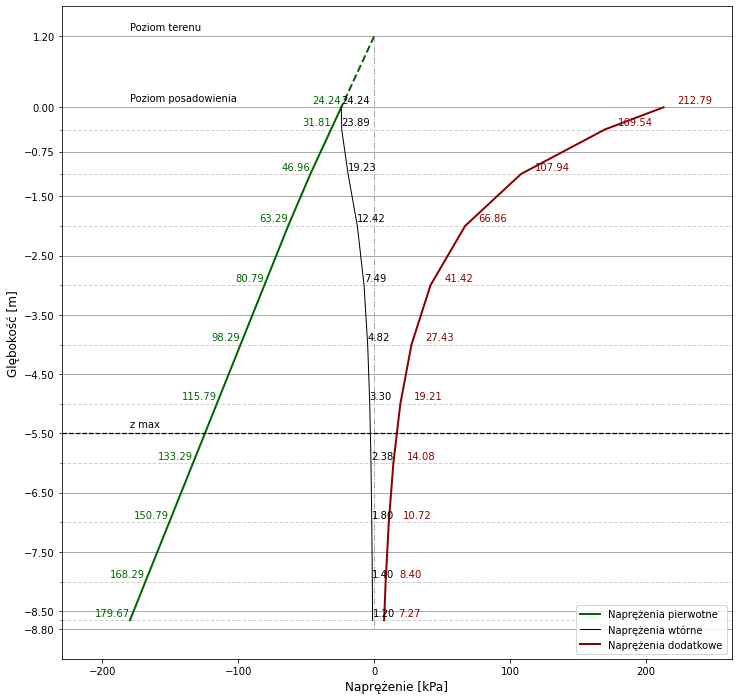

In [17]:
fig, axs = plt.subplots(figsize=(12,12))

y = df_plt.loc[1:, "z"]

# naprężenia pierwotne
x = df_plt.loc[1:, "sigma_g"]
axs.plot(x, y, linestyle="-", linewidth=2, color="darkgreen", label="Naprężenia pierwotne")

for i in df.loc[1:].index:
    axs.annotate(f'{df.loc[i, "sigma_g"]:.2f}', 
                 xy=(x.loc[i]-0.07, y.loc[i]+0.07), 
                 size=10,
                 horizontalalignment="right",
                 color="darkgreen")

plot_add = df_plt.loc[0:1, ["d", "sigma_g"]]
axs.plot(plot_add.sigma_g, plot_add.d, linestyle="--", linewidth=2, color="darkgreen")

# naprężenia wtórne
x = df_plt.loc[1:, "sigma_s"]
axs.plot(x, y, linestyle="-", linewidth=1, color="black", label="Naprężenia wtórne")

for i in df.loc[1:].index:
    axs.annotate(f'{df.loc[i, "sigma_s"]:.2f}', 
                 xy=(x[i]-0.07, y.loc[i]+0.07),
                 size=10,
                 horizontalalignment="left",
                 color="black")

# naprężenia dodatkowe
x = df_plt.loc[1:, "sigma_d"]
axs.plot(x, y, linestyle="-", linewidth=2, color="darkred", label="Naprężenia dodatkowe")

for i in df.loc[1:].index:
    axs.annotate(f'{df.loc[i, "sigma_d"]:.2f}', 
                 xy=(x[i]+10, y.loc[i]+0.07),
                 size=10,
                 horizontalalignment="left",
                 color="darkred")

# x axis
axs.set_xlabel("Naprężenie [kPa]", fontdict={"fontsize": 12})
axs.set_xlim(df_plt.sigma_g.min()-50, df_plt.sigma_d.max()+50)

# y axis
axs.set_ylabel("Glębokość [m]", fontdict={"fontsize": 12})
axs.set_ylim(df_plt.d.min()-0.5, df_plt.d.max()+0.5)
axs.set_yticks(df_plt.d)
axs.set_yticks(df_plt.loc[1:, "z"], minor=True)

# y major grid
axs.grid(which="major", axis="y", linestyle="-", linewidth=1, color="darkgrey")

# y minor grid
axs.grid(which="minor", axis="y", linestyle="--", linewidth=1, color="lightgrey")

# oś fundamentu
axs.add_artist(lines.Line2D([0, 0], [df_plt.loc[0, "d"], df_plt.loc[df.index[-1], "d"]], 
                            linestyle="-.", linewidth=1, color="darkgrey"))

# z_max
xs = [df_plt.sigma_g.min()-50, df_plt.sigma_d.max()+50]
ys = [df_plt.loc[z_max_idx, "d"], df_plt.loc[z_max_idx, "d"]]
axs.add_artist(lines.Line2D(xs, ys, linestyle="--", linewidth=1.25, color="black"))
axs.annotate("z max", xy=(df_plt.sigma_g.min(), df_plt.loc[z_max_idx, "d"]+0.1), size=10)

# other annotations
axs.annotate("Poziom terenu", xy=(df_plt.sigma_g.min(), df_plt.d.max()+0.1), size=10)
axs.annotate("Poziom posadowienia", xy=(df_plt.sigma_g.min(), 0.1), size=10)

axs.legend(loc="lower right")

plt.show()

#### Osiadanie gruntu pod fundamentem
* wg PN-81/B-03020, pkt 3.5.3 (20) (21)

In [18]:
if df.M0.notna().all() and df.M.notna().all():
    df["s_prim"] = df.sigma_d.mul(df.h).div(df.M0) # (21)
    df["s_bis"] = df.sigma_s.mul(df.h).div(df.M) # (20)
df

,no,d,gamma,M0,M,h,z,sigma_g,sigma_gp,sigma_q,sigma_s,sigma_d,s_prim,s_bis
0,1,-1.20,20.20,22,27.50,nan,nan,0.00,nan,nan,nan,0.00,nan,nan
1,1,0.00,20.20,22,27.50,0.00,0.00,24.24,24.24,237.03,24.24,212.79,0.00,0.00
2,1,0.75,20.20,22,27.50,0.75,0.38,31.81,23.89,193.43,23.89,169.54,5.78,0.65
3,1,1.50,20.20,22,27.50,0.75,1.12,46.96,19.23,127.17,19.23,107.94,3.68,0.52
4,2,2.50,17.50,105,116.70,1.00,2.00,63.29,12.42,79.28,12.42,66.86,0.64,0.11
5,2,3.50,17.50,105,116.70,1.00,3.00,80.79,7.49,48.92,7.49,41.42,0.39,0.06
6,2,4.50,17.50,105,116.70,1.00,4.00,98.29,4.82,32.24,4.82,27.43,0.26,0.04
7,2,5.50,17.50,105,116.70,1.00,5.00,115.79,3.30,22.51,3.30,19.21,0.18,0.03
8,2,6.50,17.50,105,116.70,1.00,6.00,133.29,2.38,16.47,2.38,14.08,0.13,0.02
9,2,7.50,17.50,105,116.70,1.00,7.00,150.79,1.80,12.51,1.80,10.72,0.10,0.02


* wg PN-81/B-03020, pkt 3.5.3 (19)

In [19]:
if "s_prim" in df.columns and "s_bis" in df.columns:
    settlement = df.loc[1:z_max_idx, ["s_prim", "s_bis"]].sum()
    print(f"Osiadanie gruntu pod fundamentem wynosi: {settlement.sum():.2f}mm")
else:
    print(f"Z powodu braku danych M0 oraz M, nie obliczono osiadania.")

Osiadanie gruntu pod fundamentem wynosi: 12.35mm


#### Podsumowanie obliczeń

In [20]:
summary_columns = ["gamma", "M0", "M", "d", "h", "z", "sigma_g", "sigma_s", "sigma_d"]
if "s_prim" in df.columns and "s_bis" in df.columns:
    summary_columns.extend(["s_prim", "s_bis"])

results = df.loc[1:z_max_idx+1, summary_columns].copy()
results

,gamma,M0,M,d,h,z,sigma_g,sigma_s,sigma_d,s_prim,s_bis
1,20.20,22,27.50,0.00,0.00,0.00,24.24,24.24,212.79,0.00,0.00
2,20.20,22,27.50,0.75,0.75,0.38,31.81,23.89,169.54,5.78,0.65
3,20.20,22,27.50,1.50,0.75,1.12,46.96,19.23,107.94,3.68,0.52
4,17.50,105,116.70,2.50,1.00,2.00,63.29,12.42,66.86,0.64,0.11
5,17.50,105,116.70,3.50,1.00,3.00,80.79,7.49,41.42,0.39,0.06
6,17.50,105,116.70,4.50,1.00,4.00,98.29,4.82,27.43,0.26,0.04
7,17.50,105,116.70,5.50,1.00,5.00,115.79,3.30,19.21,0.18,0.03
8,17.50,105,116.70,6.50,1.00,6.00,133.29,2.38,14.08,0.13,0.02
